In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from google.colab import drive

In [2]:
# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Define transformation for preprocessing the images
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize the images to 64x64
    transforms.ToTensor(),         # Convert images to tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the images
])


In [4]:
# Load train and test datasets
train_data = datasets.ImageFolder('/content/drive/My Drive/training_set', transform=transform)
test_data = datasets.ImageFolder('/content/drive/My Drive/test_set', transform=transform)


In [5]:
# Create data loaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [6]:
# CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 2)  # Output classes: 2 (cats and dogs)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [7]:
# Initialize the model
model = CNN()


In [8]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    # Training loop
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)fe
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Calculate accuracy on the test dataset
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_accuracy = 100 * correct / total

    # Print epoch statistics
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}, Accuracy: {epoch_accuracy:.2f}%')

print('Finished Training')


Epoch [1/10], Loss: 0.6420, Accuracy: 62.48%
Epoch [2/10], Loss: 0.5542, Accuracy: 68.71%
Epoch [3/10], Loss: 0.4895, Accuracy: 75.04%
Epoch [4/10], Loss: 0.4375, Accuracy: 78.79%
Epoch [5/10], Loss: 0.3863, Accuracy: 73.65%
Epoch [6/10], Loss: 0.3272, Accuracy: 78.05%
Epoch [7/10], Loss: 0.2467, Accuracy: 79.04%
Epoch [8/10], Loss: 0.1739, Accuracy: 78.79%
Epoch [9/10], Loss: 0.1098, Accuracy: 79.39%
Epoch [10/10], Loss: 0.0791, Accuracy: 78.89%
Finished Training


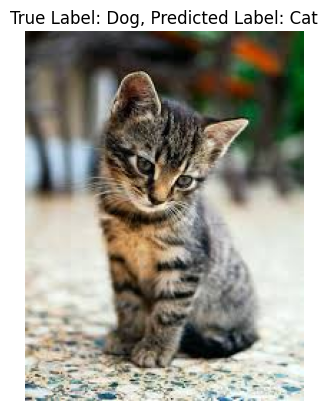

In [10]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

def classify_image(model, image_path, true_label):
    # Define transformation for preprocessing the image
    transform = transforms.Compose([
        transforms.Resize((64, 64)),  # Resize the image to 64x64
        transforms.ToTensor(),         # Convert the image to a tensor
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the image
    ])

    # Load the image
    image = Image.open(image_path)
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

    # Make prediction
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted = torch.max(output, 1)
        predicted_class = 'Cat' if predicted.item() == 0 else 'Dog'

    # Display the image with true and predicted labels
    plt.imshow(image)
    plt.title(f'True Label: {true_label}, Predicted Label: {predicted_class}')
    plt.axis('off')
    plt.show()


classify_image(model, image_path='/content/cat.jpg', true_label=' Cat')


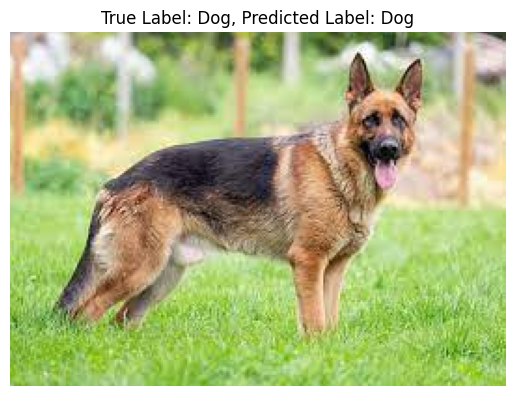

In [11]:
classify_image(model, image_path='/content/Dog.jpg', true_label='Dog')